In [1]:
import pandas as pd
import numpy as np

### Load Movie Data

In [2]:
rating = pd.read_csv('d:\\Desktop/Netflix_Dataset_Rating.csv')
rating

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496


In [3]:
movies = pd.read_csv('https://raw.githubusercontent.com/ThisIs66/RS/main/Netflix_Dataset_Movie.csv')
movies

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


### Merge two dataset

In [4]:
df = pd.merge(movies, rating, left_on = "Movie_ID", right_on = "Movie_ID", how = "inner" )
df

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [5]:
pd.crosstab(df.Name,df.Rating)

Rating,1,2,3,4,5
Name,,,,,
10,226,850,2075,1159,334
10 Things I Hate About You,739,2934,12133,13847,8812
101 Dalmatians II: Patch's London Adventure,161,460,2180,1890,931
11:14,81,215,713,561,129
13 Ghosts,341,716,1844,2012,1647
...,...,...,...,...,...
Yojimbo,311,436,1404,3417,3400
Young Black Stallion,75,218,676,465,158
Youngblood,156,442,1184,861,357


In [6]:
pd.crosstab(df.Name=='Character',df.Rating)

Rating,1,2,3,4,5
Name,,,,,
False,721295,1759170,5185221,5900702,3769546
True,61,111,429,666,257


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_ID  int64 
 1   Year      int64 
 2   Name      object
 3   User_ID   int64 
 4   Rating    int64 
dtypes: int64(4), object(1)
memory usage: 793.6+ MB


In [8]:
df.columns =['movie_id', 'year', 'name', 'user_id', 'rating']
df

,movie_id,year,name,user_id,rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   movie_id  int64 
 1   year      int64 
 2   name      object
 3   user_id   int64 
 4   rating    int64 
dtypes: int64(4), object(1)
memory usage: 793.6+ MB


In [10]:
df.isnull().sum()

movie_id    0
year        0
name        0
user_id     0
rating      0
dtype: int64

In [11]:
df.rating.mean()

3.590569909383486

In [12]:
df.groupby('name').rating.mean().sort_values(ascending = False).head(10)

name
Lost: Season 1                                   4.665432
The Simpsons: Season 6                           4.589824
Family Guy: Freakin' Sweet Collection            4.520766
Six Feet Under: Season 4                         4.461601
Inu-Yasha                                        4.457774
Stargate SG-1: Season 8                          4.456026
The Best of Friends: Vol. 4                      4.449168
The West Wing: Season 3                          4.436258
Lord of the Rings: The Fellowship of the Ring    4.431489
Gilmore Girls: Season 3                          4.428943
Name: rating, dtype: float64

In [13]:
mean_rating=df.groupby('name').rating.mean().sort_values(ascending = False)
mean_rating

name
Lost: Season 1                           4.665432
The Simpsons: Season 6                   4.589824
Family Guy: Freakin' Sweet Collection    4.520766
Six Feet Under: Season 4                 4.461601
Inu-Yasha                                4.457774
                                           ...   
Ernest Goes to Jail                      2.221938
Freddy Got Fingered                      2.217361
Gerry                                    2.203597
Spice World                              2.101550
House of the Dead                        1.962031
Name: rating, Length: 1342, dtype: float64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\alway\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

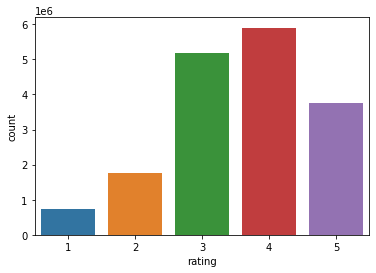

In [15]:
sns.countplot(df.rating)

In [16]:
ratings=pd.DataFrame(df.groupby('name')['rating'].mean())
ratings

,rating
name,
10,3.113049
10 Things I Hate About You,3.703471
101 Dalmatians II: Patch's London Adventure,3.528282
11:14,3.260153
13 Ghosts,3.595732
...,...
Yojimbo,4.021298
Young Black Stallion,3.259422
Youngblood,3.273667


In [17]:
# some movies rated by only small group user, drop the movies that not enough review
f = ['count','mean']
df_movie_summary = df.groupby('movie_id')['rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

In [18]:
movie_benchmark

11472.0

In [19]:
df_movie_summary

,count,mean
movie_id,,
3,1524,3.621391
8,9379,3.136795
16,2517,3.081843
17,4165,2.909964
18,9419,3.767597
...,...,...
4488,27997,3.540236
4490,7507,3.161849
4492,7511,2.652510


In [20]:
df_movie = pd.merge(df,df_movie_summary, left_on = "movie_id", right_on = "movie_id" )
df_movie

,movie_id,year,name,user_id,rating,count,mean
0,3,1997,Character,712664,5,1524,3.621391
1,3,1997,Character,1331154,4,1524,3.621391
2,3,1997,Character,2632461,3,1524,3.621391
3,3,1997,Character,44937,5,1524,3.621391
4,3,1997,Character,656399,4,1524,3.621391
...,...,...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3,7835,3.765795
17337454,4496,1993,Farewell My Concubine,1055714,5,7835,3.765795
17337455,4496,1993,Farewell My Concubine,2643029,4,7835,3.765795
17337456,4496,1993,Farewell My Concubine,1559566,3,7835,3.765795


## Filter Sparse Movies And Users
To reduce the dimensionality of the dataset I am filtering rarely rated movies and rarely rating users out.

In [34]:
# Filter sparse movies
min_movie_ratings = 10000
filter_movies = (df['movie_id'].value_counts()>min_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

# Filter sparse users
min_user_ratings = 200
filter_users = (df['user_id'].value_counts()>min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

# Actual filtering
df_filterd = df[(df['movie_id'].isin(filter_movies)) & (df['user_id'].isin(filter_users))]
del filter_movies, filter_users, min_movie_ratings, min_user_ratings
print('Shape User-Ratings unfiltered:\t{}'.format(df.shape))
print('Shape User-Ratings filtered:\t{}'.format(df_filterd.shape))

Shape User-Ratings unfiltered:	(17337458, 5)
Shape User-Ratings filtered:	(3686735, 5)


In [38]:
# Create Train And Testset


# Testingsize
n = 100000

# Split train- & testset
df_train = df_filterd[:-n]
df_test = df_filterd[-n:]

The trainset will be used to train all models and the testset ensures comparibility between all models with the RMSE metric.

In [40]:
# To create sparse matrices
from scipy.sparse import coo_matrix

## Light FM

In [42]:
# light fm
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

In [41]:
# Create user- & movie-id mapping
user_id_mapping = {id:i for i, id in enumerate(df_filterd['user_id'].unique())}
movie_id_mapping = {id:i for i, id in enumerate(df_filterd['movie_id'].unique())}


# Create correctly mapped train- & testset
train_user_data = df_train['user_id'].map(user_id_mapping)
train_movie_data = df_train['movie_id'].map(movie_id_mapping)

test_user_data = df_test['user_id'].map(user_id_mapping)
test_movie_data = df_test['movie_id'].map(movie_id_mapping)


# Create sparse matrix from ratings
shape = (len(user_id_mapping), len(movie_id_mapping))
train_matrix = coo_matrix((df_train['rating'].values, (train_user_data.astype(int), train_movie_data.astype(int))), shape=shape)
test_matrix = coo_matrix((df_test['rating'].values, (test_user_data.astype(int), test_movie_data.astype(int))), shape=shape)


# Instantiate and train the model
model = LightFM(loss='warp', no_components=20)
model.fit(train_matrix, epochs=20, num_threads=2)


# Evaluate the trained model
k = 20
print('Train precision at k={}:\t{:.4f}'.format(k, precision_at_k(model, train_matrix, k=k).mean()))
print('Test precision at k={}:\t\t{:.4f}'.format(k, precision_at_k(model, test_matrix, k=k).mean()))

Train precision at k=20:	0.9786
Test precision at k=20:		0.0000


## Spotlight

In [44]:
pip install spotlight

Note: you may need to restart the kernel to use updated packages.


In [55]:
from spotlight import Validator

In [1]:
from spotlight.evaluation import mrr_score
from spotlight.factorization.implicit import ImplicitFactorizationModel

ModuleNotFoundError: No module named 'spotlight.evaluation'

## Surprise Library

In [59]:
# To use recommender systems
import surprise as sp
from surprise.model_selection import cross_validate

In [61]:
# Load dataset into surprise specific data-structure
data = sp.Dataset.load_from_df(df_filterd[['user_id', 'movie_id', 'rating']].sample(20000), sp.Reader())

benchmark = []
# Iterate over all algorithms
for algorithm in [sp.SVD(), sp.SVDpp(), sp.SlopeOne(), sp.NMF(), sp.NormalPredictor(), sp.KNNBaseline(), sp.KNNBasic(), sp.KNNWithMeans(), sp.KNNWithZScore(), sp.BaselineOnly(), sp.CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    
    # Store data
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [70]:
# Store results
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse', ascending=False)
surprise_results

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
NormalPredictor,1.425860,1.147652,0.025355,0.050310
SlopeOne,1.200913,0.940286,0.130653,0.044667
KNNWithMeans,1.192776,0.934007,2.586256,0.195051
KNNWithZScore,1.190711,0.933241,3.277327,0.213346
NMF,1.181263,0.956374,1.631673,0.039322
CoClustering,1.151923,0.921466,1.188292,0.032002
KNNBasic,1.069017,0.890091,2.414333,0.188991
KNNBaseline,1.013515,0.816347,2.718629,0.181005
SVD,0.996131,0.800147,0.864321,0.042656


In [71]:
# Get data
data = surprise_results[['test_rmse', 'test_mae']]
grid = data.values
grid

array([[1.42585968, 1.14765154],
       [1.20091282, 0.94028587],
       [1.1927762 , 0.93400712],
       [1.19071129, 0.93324066],
       [1.18126302, 0.95637399],
       [1.15192345, 0.92146552],
       [1.06901681, 0.89009075],
       [1.01351455, 0.81634671],
       [0.99613081, 0.80014702],
       [0.9934408 , 0.80183352],
       [0.99298198, 0.80372916]])

In [65]:
# Create axis labels
#https://www.kaggle.com/code/morrisb/how-to-recommend-anything-deep-recommender
x_axis = [label.split('_')[1].upper() for label in data.columns.tolist()]
y_axis = data.index.tolist()

x_label = 'Function'
y_label = 'Algorithm'

## Collaborative Filtering - SVD

In [21]:
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [22]:
model = SVD(n_epochs=10,verbose = True)

data = Dataset.load_from_df(df[['user_id', 'movie_id', 'rating']], Reader())

trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

trainset = data.build_full_trainset()

model.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [23]:
predictions = model.test(testset)

accuracy.rmse(predictions, verbose=True)

RMSE: 0.8286


0.828597901662165

In [24]:
movies

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004,Fidel Castro: American Experience
17767,17768,2000,Epoch
17768,17769,2003,The Company


In [25]:
def Recommendation(given_user_id,n_movies):
    given_user = movies.copy()
    given_user = given_user.reset_index()
    given_user = given_user[~given_user['Movie_ID'].isin(drop_movie_list)]

    given_user['Estimated_Rating'] = given_user['Movie_ID'].apply(lambda x: model.predict(given_user_id, x).est)

    given_user = given_user.sort_values('Estimated_Rating', ascending=False)
    given_user.drop(['index'], axis = 1,inplace=True)
    given_user.reset_index(inplace=True,drop=True)
    return given_user.head(n_movies)

### Recommend for user 44937

In [26]:
Recommendation(44937,5)

,Movie_ID,Year,Name,Estimated_Rating
0,872,1954,Seven Samurai,4.556837
1,2803,1995,Pride and Prejudice,4.540417
2,3046,1990,The Simpsons: Treehouse of Horror,4.514425
3,241,1959,North by Northwest,4.481509
4,2172,1991,The Simpsons: Season 3,4.467170
